In [30]:
import pandas as pd

df = pd.read_csv(r"C:\Users\rajan\Downloads\retail_sales\retail_sales.csv.csv")

In [32]:
print (df.head())

         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29


In [38]:
df['data'] = pd.to_datetime(df['data'])      
df = df.sort_values('data')                    

In [40]:
print(df.columns)

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')


In [42]:
df.set_index('data', inplace=True)

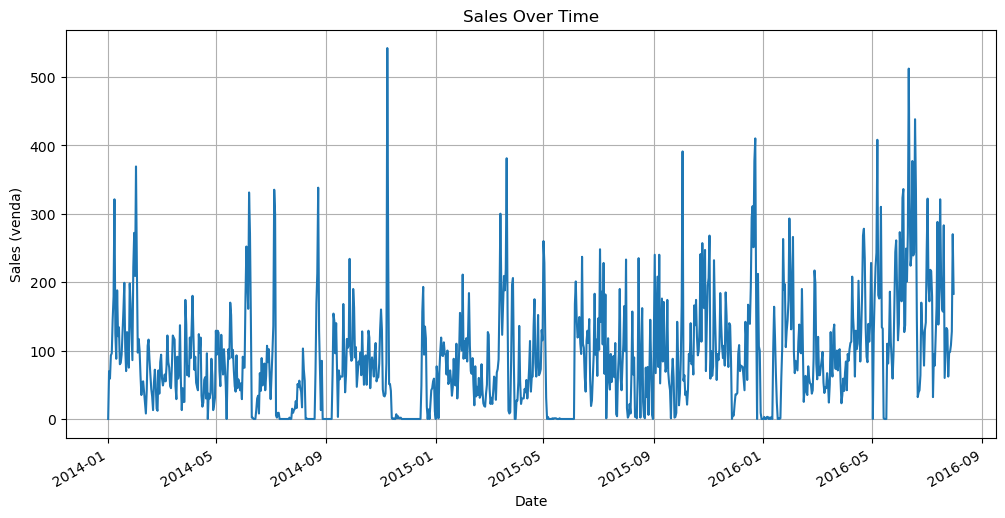

In [44]:
import  matplotlib.pyplot as plt
df['venda'].plot(figsize=(12,6))
plt.title("Sales Over Time")
plt.ylabel("Sales (venda)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

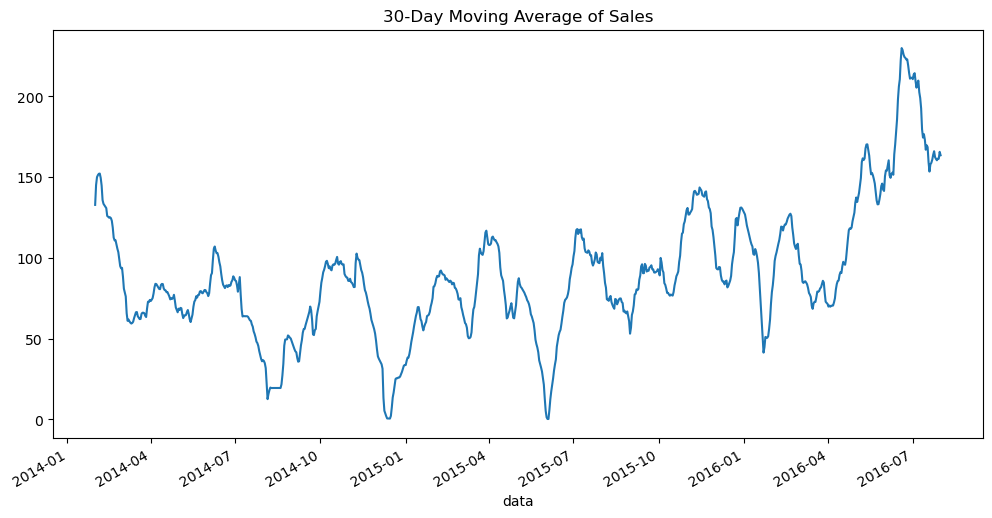

In [46]:
df['venda'].rolling(window=30).mean().plot(figsize=(12, 6))
plt.title("30-Day Moving Average of Sales")
plt.show()

In [50]:
!pip install prophet

  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.76-py3-none-any.whl.metadata (44 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached holidays-0.76-py3-none-any.whl (1.1 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


In [52]:
from prophet import Prophet  
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'  
)


model.add_country_holidays(country_name='US')  

In [54]:
print(prophet_df.head())

        data  venda  estoque  preco
0 2014-01-01      0     4972   1.29
1 2014-01-02     70     4902   1.29
2 2014-01-03     59     4843   1.29
3 2014-01-04     93     4750   1.29
4 2014-01-05     96     4654   1.29


In [58]:
model = Prophet(
    changepoint_prior_scale=0.05,  
    seasonality_prior_scale=10.0,  
    holidays_prior_scale=10.0,
    n_changepoints=25
)

In [62]:
print("Training data shape:", train.shape)
print("Training data columns:", train.columns)
print("First 5 rows:\n", train.head())
print("Data types:\n", train.dtypes)

Training data shape: (847, 4)
Training data columns: Index(['data', 'venda', 'estoque', 'preco'], dtype='object')
First 5 rows:
          data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29
Data types:
 data        object
venda        int64
estoque      int64
preco      float64
dtype: object


In [66]:
print("Current columns in your DataFrame:", prophet_df.columns.tolist())
print("\nSample data:")
print(prophet_df.head())

Current columns in your DataFrame: ['data', 'venda', 'estoque', 'preco']

Sample data:
         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29


In [68]:
current_date_col = 'date' 
current_value_col = 'sales'  

prophet_df = prophet_df.rename(columns={
    current_date_col: 'ds',
    current_value_col: 'y'
})

print("\nAfter renaming:")
print(prophet_df.head())


After renaming:
         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29


In [70]:

date_candidates = ['date', 'time', 'timestamp', 'ds']
value_candidates = ['sales', 'value', 'target', 'y', 'amount']

date_col = next((col for col in date_candidates if col in prophet_df.columns), None)
value_col = next((col for col in value_candidates if col in prophet_df.columns), None)

if date_col and value_col:
    prophet_df = prophet_df.rename(columns={date_col: 'ds', value_col: 'y'})
    print(f"Renamed {date_col} → 'ds' and {value_col} → 'y'")
else:
    print("Could not identify required columns. Current columns:", prophet_df.columns.tolist())

Could not identify required columns. Current columns: ['data', 'venda', 'estoque', 'preco']


In [76]:
import pandas as pd
from prophet import Prophet

# 1. Show your current data structure
print("Original columns:", prophet_df.columns.tolist())
print("\nFirst 3 rows:")
print(prophet_df.head(3).to_dict())

# 2. Clean column names (remove whitespace, special characters)
prophet_df.columns = prophet_df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Identify correct columns automatically
def find_column(df, possible_names):
    for name in possible_names:
        if name in df.columns:
            return name
    return None

date_col = find_column(prophet_df, ['date', 'ds', 'time', 'timestamp', 'day'])
value_col = find_column(prophet_df, ['sales', 'y', 'value', 'calls', 'amount', 'volume'])

if not date_col or not value_col:
    raise ValueError(f"Couldn't find required columns. Existing columns: {prophet_df.columns.tolist()}")

# 4. Properly rename columns
prophet_df = prophet_df.rename(columns={
    date_col: 'ds',
    value_col: 'y'
})

# 5. Convert data types
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], errors='coerce')
prophet_df['y'] = pd.to_numeric(prophet_df['y'], errors='coerce')

# 6. Clean the data
prophet_df = prophet_df.dropna(subset=['ds', 'y'])
print("\nCleaned data structure:")
print(prophet_df.head())

Original columns: ['data', 'venda', 'estoque', 'preco']

First 3 rows:
{'data': {0: '2014-01-01', 1: '2014-01-02', 2: '2014-01-03'}, 'venda': {0: 0, 1: 70, 2: 59}, 'estoque': {0: 4972, 1: 4902, 2: 4843}, 'preco': {0: 1.29, 1: 1.29, 2: 1.29}}


ValueError: Couldn't find required columns. Existing columns: ['data', 'venda', 'estoque', 'preco']